--> Using Ridge to predict the future values for Electricity Production

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Electric_Production.csv')

data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
data.rename(columns={'IPG2211A2N': 'Electric_Production'}, inplace=True)

--> Training and evaluating the model

In [4]:
n_lags = 20

# Function to create lag features
def create_features(data, target_col, n_lags=12):
    df = data.copy()
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df[target_col].shift(lag)
    return df.dropna()

In [5]:
supervised_data = create_features(data, target_col = 'Electric_Production', n_lags=n_lags)

X = supervised_data.drop(columns=['Electric_Production'])
Y = supervised_data['Electric_Production']

In [6]:
if 'DATE' in X.columns:
    X = X.drop(columns=['DATE'])

In [7]:
X

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20
20,64.4816,65.7655,59.9005,55.8137,57.0329,62.2221,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720,72.5052
21,61.0005,64.4816,65.7655,59.9005,55.8137,57.0329,62.2221,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720
22,57.5322,61.0005,64.4816,65.7655,59.9005,55.8137,57.0329,62.2221,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502
23,59.3417,57.5322,61.0005,64.4816,65.7655,59.9005,55.8137,57.0329,62.2221,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714
24,68.1354,59.3417,57.5322,61.0005,64.4816,65.7655,59.9005,55.8137,57.0329,62.2221,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900,91.4867,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837
393,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900,91.4867,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688
394,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900,91.4867,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548
395,97.3359,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900,91.4867,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254


In [8]:
Y

20      61.0005
21      57.5322
22      59.3417
23      68.1354
24      73.8152
         ...   
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: Electric_Production, Length: 377, dtype: float64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [10]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [11]:
model.fit(X_train, Y_train)

ElasticNet()

In [12]:
y_pred = model.predict(X_test)

In [13]:
y_pred

array([ 89.54749844,  94.60772467, 111.75585444, 117.41066522,
       107.64692719,  95.5169506 ,  87.09713521,  91.4190215 ,
       105.01170672, 113.85047764, 112.5553072 ,  98.74259588,
        89.53746305,  94.229703  , 107.00824252, 112.16432352,
       107.13554585,  95.15678079,  92.06471657,  94.62929518,
       102.93127768, 112.01532575, 108.81419457,  97.13622682,
        91.21998738,  94.65105388, 107.3283147 , 117.85782206,
       113.67605869, 103.13347425,  93.17089269,  92.15275252,
       102.62948461, 110.98212254, 108.60187654,  99.03270988,
        92.71829895,  97.49814678, 113.34519308, 120.54597651,
       114.05965212, 103.79627154,  91.99527846,  92.75116684,
       102.82173937, 110.81745148, 110.58527728, 101.08143087,
        94.067366  ,  97.75701733, 107.34857443, 116.7362313 ,
       115.26547248,  99.57042176,  87.62358215,  91.27896331,
       103.30930702, 113.5124759 , 112.80688807, 103.44141738,
        92.75756257,  93.50251566, 104.5424018 , 119.07

In [14]:
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print(mse, rmse)

12.778657014206779 3.5747247466352956


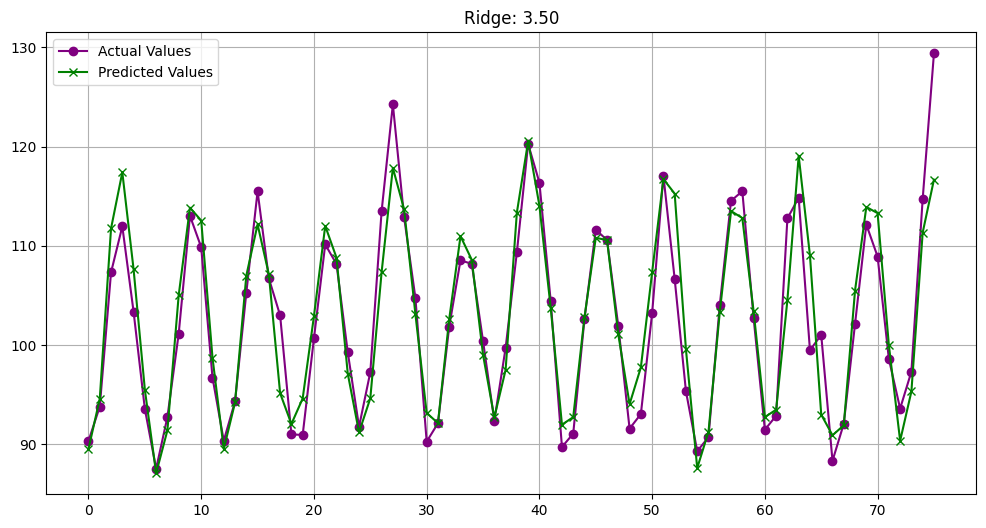

In [15]:
plt.figure(figsize=(12, 6))
plt.title('Ridge: 3.50')
plt.plot(Y_test.values, label='Actual Values', color='purple', marker='o')
plt.plot(y_pred, label='Predicted Values', color='green', marker='x')
plt.legend()
plt.grid()
plt.show()

--> Using the model for making actual future predictions

In [16]:
start_date = pd.to_datetime('2018-02-01')
end_date = pd.to_datetime('2019-01-01')
future_dates = pd.date_range(start=start_date, end=end_date, freq='MS')

future_dates

DatetimeIndex(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [17]:
last_values = data['Electric_Production'][-n_lags:].values[::-1]

last_values

array([129.4048, 114.7212,  97.3359,  93.6137,  98.6154, 108.9312,
       112.1538, 102.1532,  92.0805,  88.353 , 101.0396,  99.4901,
       114.8505, 112.7694,  92.89  ,  91.4867, 102.7637, 115.5159,
       114.5397, 104.0375])

In [18]:
future_preds = []

for date in future_dates:
    
    future_features = {f'lag_{i+1}': last_values[i] for i in range(n_lags)}
    feature_df = pd.DataFrame([future_features])

    prediction = model.predict(feature_df)[0]
    future_preds.append(prediction)

    last_values = np.roll(last_values, shift=1)

future_preds

[111.57346713116706,
 98.39593795587082,
 96.73224925566046,
 105.08103014198414,
 108.44216467388028,
 107.30483987727695,
 101.8802785153252,
 100.92733448647773,
 100.72463454903874,
 100.25577344797244,
 113.7316972610035,
 112.06326383344421]

In [19]:
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predictions': future_preds
})

future_df

,Date,Predictions
0,2018-02-01,111.573467
1,2018-03-01,98.395938
2,2018-04-01,96.732249
3,2018-05-01,105.081030
4,2018-06-01,108.442165
5,2018-07-01,107.304840
6,2018-08-01,101.880279
7,2018-09-01,100.927334
8,2018-10-01,100.724635
9,2018-11-01,100.255773


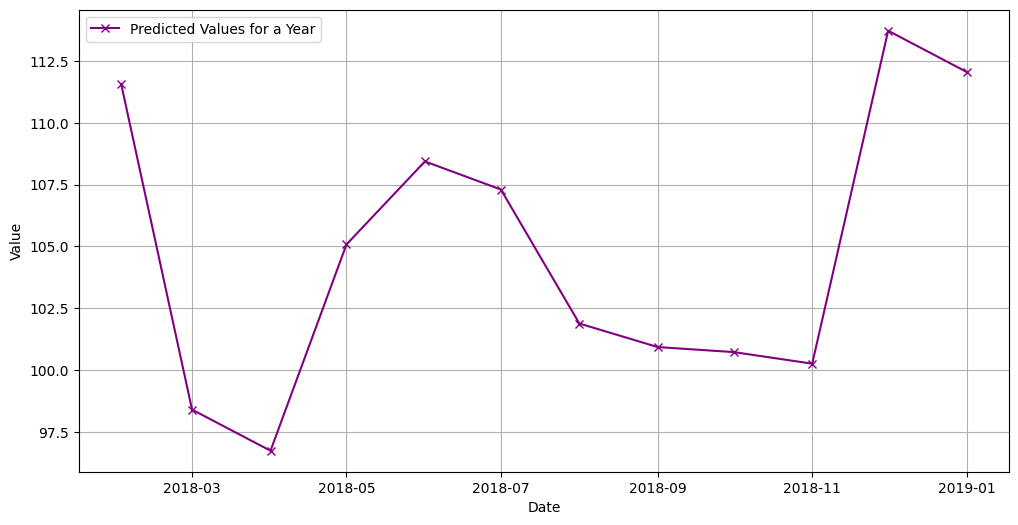

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(future_df['Date'], future_df['Predictions'], label='Predicted Values for a Year', marker='x', color='purple')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [21]:
data['DATE'] = pd.to_datetime(data['DATE'])

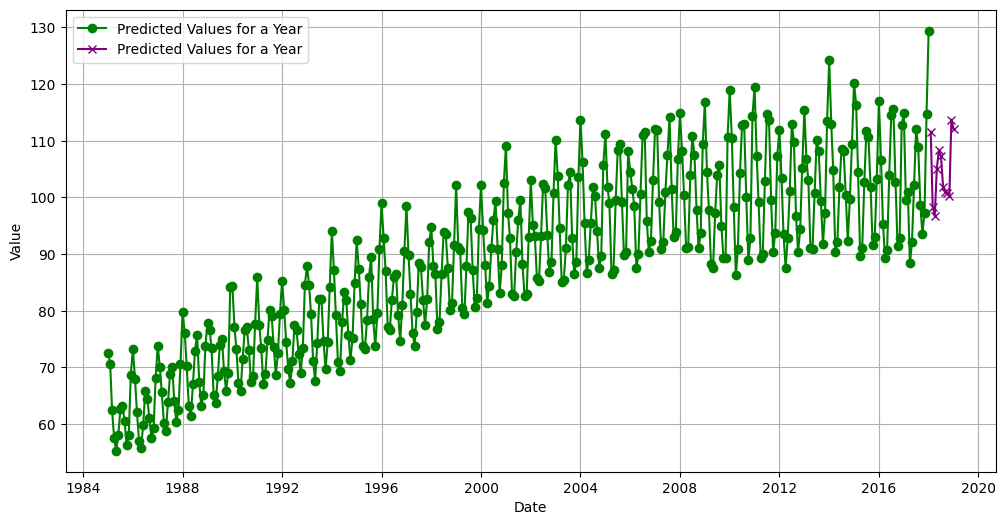

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['Electric_Production'], label='Predicted Values for a Year', marker='o', color='green')
plt.plot(future_df['Date'], future_df['Predictions'], label='Predicted Values for a Year', marker='x', color='purple')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()